# Aprendizagem de Máquina Serial
## Classificação de Tipos de Arroz (Cammeo e Osmancik)
---


O Machine Learning é o método de extrair conhecimento a partir de dados. É um campo que combina estatística, inteligência artificial e ciência da computação, e também é usado para prever análises ou aprendizado estatístico. Eles são chamados de algoritmos de aprendizagem supervisionada porque é necessário fornecer supervisão aos algoritmos na forma das saídas desejadas para cada exemplo de aprendizado. Portanto, cada linha do conjunto de dados possui a resposta correta para o problema, neste caso, uma classificação correta.

## Rice (Cammeo and Osmancik) Database 
----

Entre as variedades de arroz certificadas cultivadas na TURQUIA, as espécies Osmancik, que possuem uma grande área de plantio desde 1997, e a espécie Cammeo, cultivada desde 2014, foram selecionadas para o estudo. Ao analisar as características gerais da espécie Osmancik, observa-se que elas possuem uma aparência ampla, longa, vítrea e opaca. Ao analisar as características gerais da espécie Cammeo, observa-se que elas possuem uma aparência ampla, longa, vítrea e opaca. Um total de 3810 imagens de grãos de arroz foram capturadas para as duas espécies, processadas e obtidas inferências de características. Foram obtidas 7 características morfológicas para cada grão de arroz.

### Atributo a ser predito:
Tipo de grão de arroz.

### Número de instâncias:
3810

### Número de Atributos:
7 features extraídas das imagens e a classe.

### Informações dos atributos:

1.) Área: Retorna o número de pixels dentro dos limites do grão de arroz.

2.) Perímetro: Calcula a circunferência calculando a distância entre os pixels ao redor dos limites do grão de arroz.

3.) Comprimento do Eixo Principal: A linha mais longa que pode ser desenhada no grão de arroz, ou seja, a distância do eixo principal.

4.) Comprimento do Eixo Menor: A linha mais curta que pode ser desenhada no grão de arroz, ou seja, a distância do eixo menor.

5.) Excentricidade: Mede o quão redonda é a elipse, que possui os mesmos momentos do grão de arroz.

6.) Área Convexa: Retorna a contagem de pixels da menor casca convexa da região formada pelo grão de arroz.

7.) Extensão: Retorna a proporção da região formada pelo grão de arroz em relação aos pixels da caixa delimitadora.

8.) Classe: Arroz Cammeo e Osmancik.

## Referências:

1. Rice (Cammeo and Osmancik). (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5MW4Z.

In [1]:
# Load libraries
import pyspark
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.util import MLUtils

from pyspark.ml.feature import StringIndexer, IndexToString
from pyspark.ml.feature import VectorAssembler, VectorIndexer
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import LinearSVC, OneVsRest
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

from pyspark.ml.linalg import Vectors
from pyspark.mllib.util import MLUtils

## SKLearn Lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

import time
start_time = time.time()
%matplotlib inline

## Configure parameters

In [2]:
# Path to dataset file
data_path='./data/'

# Sample of train and test dataset
train_sample = 0.7
test_sample = 0.3

## Read and show dataset

In [3]:
# Importing the dataset
dataset = pd.read_csv('Rice_Cammeo_Osmancik.csv', sep=';')

# Print dataset
dataset.head(5)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [4]:
dataset.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [5]:
print("Number of itens per class")
dataset.groupby('Class').size()

Number of itens per class


Class
Cammeo      1630
Osmancik    2180
dtype: int64

In [6]:
# Read features and calass
feature_columns = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length','Eccentricity', 'Convex_Area', 'Extent']
X = dataset[feature_columns].values
y = dataset['Class'].values

# SKLearn need all column as numbers. Tranform "class" column in number
le = LabelEncoder()
y = le.fit_transform(y)

# Split ramdomly the dataset into train and test group
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_sample, random_state = 0)

<Figure size 640x480 with 0 Axes>

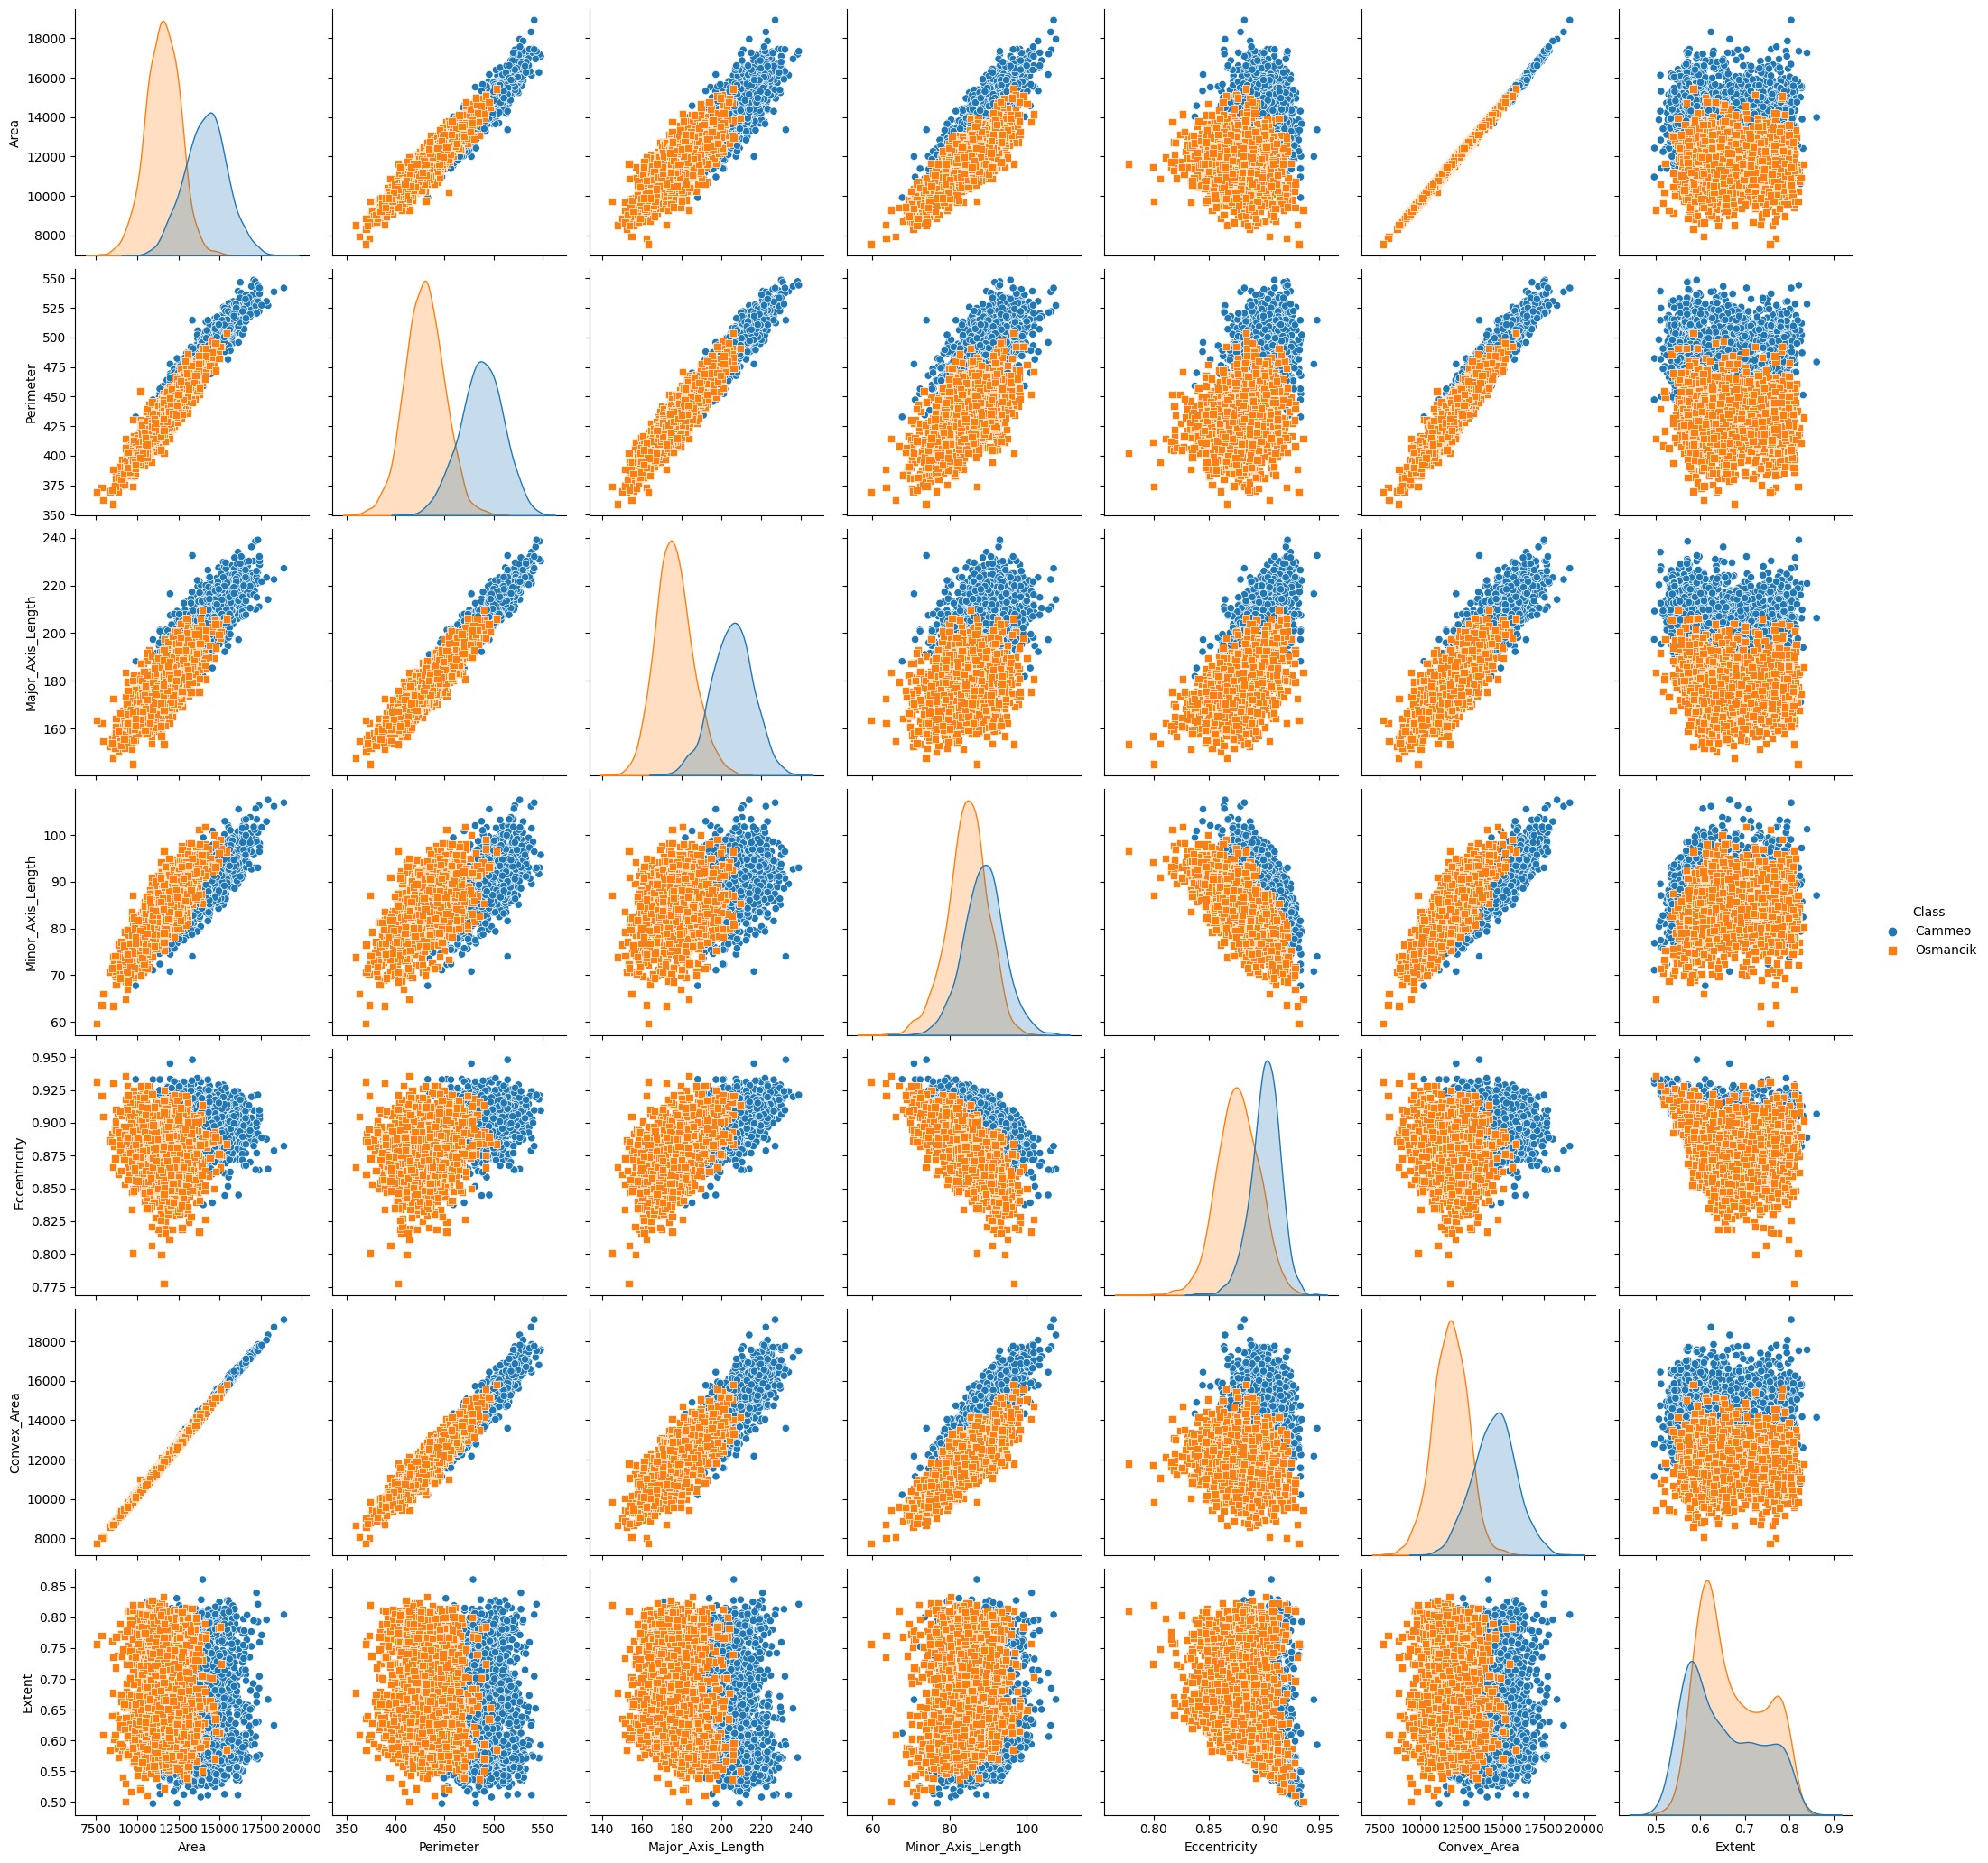

In [7]:
plt.figure()
sns.pairplot(dataset, hue = "Class", height=3, markers=["o", "s"])
plt.show()

## KNN using Scikit-learn

In [8]:
start_time_knn =  time.time()
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [9]:
accuracy_knn = accuracy_score(y_test, y_pred)*100
time_knn = time.time() - start_time_knn
print('KNN accuracy = ' + str(round(accuracy_knn, 1)) + ' %.')
print("K-Nearest Neighbors (KNN): accuracy = %3.1f %%" % accuracy_knn)
print("K-Nearest Neighbors (KNN): time = %3.3f s" % time_knn)

KNN accuracy = 87.9 %.
K-Nearest Neighbors (KNN): accuracy = 87.9 %
K-Nearest Neighbors (KNN): time = 0.222 s


## Create Spark environment

In [10]:
spark = SparkSession.builder \
        .master("local[*]") \
        .appName("MachineLearningRice") \
        .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/06/30 00:30:09 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/06/30 00:30:10 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/06/30 00:30:10 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
23/06/30 00:30:10 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
23/06/30 00:30:10 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
23/06/30 00:30:10 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.


## Reading Data

In [11]:
# Load rice CSV dataset to Spark Dataframe
orig_data = spark.read.format("csv").options(sep=';',header='true',inferschema='true').\
            load("Rice_Cammeo_Osmancik.csv")

print("Original Dataframe read from CSV file")
#orig_data.dtypes
orig_data.show(5)

Original Dataframe read from CSV file
+-----+-----------+-----------------+-----------------+------------+-----------+-----------+------+
| Area|  Perimeter|Major_Axis_Length|Minor_Axis_Length|Eccentricity|Convex_Area|     Extent| Class|
+-----+-----------+-----------------+-----------------+------------+-----------+-----------+------+
|15231|525.5789795|      229.7498779|      85.09378815| 0.928882003|      15617|0.572895527|Cammeo|
|14656|494.3110046|      206.0200653|      91.73097229| 0.895404994|      15072|0.615436316|Cammeo|
|14634|501.1220093|       214.106781|      87.76828766| 0.912118077|      14954|0.693258822|Cammeo|
|13176|458.3429871|      193.3373871|      87.44839478| 0.891860902|      13368|0.640669048|Cammeo|
|14688|507.1669922|      211.7433777|      89.31245422| 0.906690896|      15262|0.646023929|Cammeo|
+-----+-----------+-----------------+-----------------+------------+-----------+-----------+------+
only showing top 5 rows



In [12]:
orig_data.describe()

DataFrame[summary: string, Area: string, Perimeter: string, Major_Axis_Length: string, Minor_Axis_Length: string, Eccentricity: string, Convex_Area: string, Extent: string, Class: string]

### Create Classifier Matrix

In [13]:
# ML libraries doesn't accept string column => everything should be numeric! 
# create a numeric column "label" based on string column "class" 

indexer = StringIndexer(inputCol="Class", outputCol="label").fit(orig_data)
label_data = indexer.transform(orig_data)

# Save the inverse map from numeric "label" to string "class" to be used further in response
labelReverse = IndexToString().setInputCol("label")

# Show labeled dataframe with numeric lable
print("Dataframe with numeric lable")
label_data.show(5)

Dataframe with numeric lable
+-----+-----------+-----------------+-----------------+------------+-----------+-----------+------+-----+
| Area|  Perimeter|Major_Axis_Length|Minor_Axis_Length|Eccentricity|Convex_Area|     Extent| Class|label|
+-----+-----------+-----------------+-----------------+------------+-----------+-----------+------+-----+
|15231|525.5789795|      229.7498779|      85.09378815| 0.928882003|      15617|0.572895527|Cammeo|  1.0|
|14656|494.3110046|      206.0200653|      91.73097229| 0.895404994|      15072|0.615436316|Cammeo|  1.0|
|14634|501.1220093|       214.106781|      87.76828766| 0.912118077|      14954|0.693258822|Cammeo|  1.0|
|13176|458.3429871|      193.3373871|      87.44839478| 0.891860902|      13368|0.640669048|Cammeo|  1.0|
|14688|507.1669922|      211.7433777|      89.31245422| 0.906690896|      15262|0.646023929|Cammeo|  1.0|
+-----+-----------+-----------------+-----------------+------------+-----------+-----------+------+-----+
only showing top 

In [14]:
# Drop string column "class", no string column
label_data = label_data.drop("Class")

# Most Machine Learning Lib inpute 2 columns: label (output) and feature (input)
# The label column is the result to train ML algorithm 
# The feature column should join all parameters as a Vector

# Set the column names that is not part of features list
ignore = ['label']
# list will be all columns parts of features
list = [x for x in label_data.columns if x not in ignore]

# VectorAssembler mount the vector of features
assembler = VectorAssembler(
            inputCols=list,
            outputCol='features')

# Create final dataframe composed by label and a column of features vector
data = (assembler.transform(label_data).select("label","features"))

print("Final Dataframe suitable to classifier input format")
#data.printSchema()
data.show(5)

Final Dataframe suitable to classifier input format
+-----+--------------------+
|label|            features|
+-----+--------------------+
|  1.0|[15231.0,525.5789...|
|  1.0|[14656.0,494.3110...|
|  1.0|[14634.0,501.1220...|
|  1.0|[13176.0,458.3429...|
|  1.0|[14688.0,507.1669...|
+-----+--------------------+
only showing top 5 rows



### Create Train and Test Dataset

In [15]:
# Split ramdomly the dataset into train and test group
# [0.7,0.3] => 70% for train and 30% for test
# [1.0,0.2] => 100% for train and 20% for test, not good, acuracy always 100%
# [0.1,0.02] => 10% for train and 2% for test, if big datasets
# 1234 is the random seed

(train, test) = data.randomSplit([train_sample, test_sample], 1234)

## Run Decision Tree

In [16]:
start_time_dt =  time.time()

# impurity could be: entropy, gini'

trainer = DecisionTreeClassifier(featuresCol='features', labelCol='label', predictionCol='prediction', probabilityCol='probability',\
                                 rawPredictionCol='rawPrediction', maxDepth=5, maxBins=32, minInstancesPerNode=1, minInfoGain=0.0,\
                                 maxMemoryInMB=256, cacheNodeIds=False, checkpointInterval=10, impurity='gini', seed=None)

#trainer = LogisticRegression(maxIter=10, tol=1E-6, fitIntercept=True)

# train the model and get the result
model = trainer.fit(train)
result_dt = model.transform(test)

In [17]:
# compute accuracy on the test set against model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
            metricName="accuracy")

accuracy_dt = evaluator.evaluate(result_dt) * 100
time_dt = time.time() - start_time_dt

print("Decision Tree: accuracy = %3.1f %%" % accuracy_dt)
print("Decision Tree: time = %3.3f s" % time_dt)

Decision Tree: accuracy = 92.1 %
Decision Tree: time = 2.781 s


In [18]:
print("Decision Tree Final Result")
result_dt.show(5)

Decision Tree Final Result
+-----+--------------------+-------------+--------------------+----------+
|label|            features|rawPrediction|         probability|prediction|
+-----+--------------------+-------------+--------------------+----------+
|  0.0|[7551.0,369.06399...| [1093.0,9.0]|[0.99183303085299...|       0.0|
|  0.0|[7833.0,373.15701...| [1093.0,9.0]|[0.99183303085299...|       0.0|
|  0.0|[8499.0,370.44601...| [1093.0,9.0]|[0.99183303085299...|       0.0|
|  0.0|[8992.0,377.33200...| [1093.0,9.0]|[0.99183303085299...|       0.0|
|  0.0|[9050.0,379.89898...| [1093.0,9.0]|[0.99183303085299...|       0.0|
+-----+--------------------+-------------+--------------------+----------+
only showing top 5 rows



## Run Random Forest

In [19]:
start_time_rf =  time.time()

trainer = RandomForestClassifier(featuresCol='features', labelCol='label', predictionCol='prediction', probabilityCol='probability',\
                                 rawPredictionCol='rawPrediction', maxDepth=5, maxBins=32, minInstancesPerNode=1, minInfoGain=0.0,\
                                 numTrees=50, featureSubsetStrategy='auto', seed=None, subsamplingRate=1.0,\
                                 maxMemoryInMB=256, cacheNodeIds=False, checkpointInterval=10, impurity='gini')

# impurity could be: entropy, gini'
# numTrees= set the number of random trees to create

# train the model and get the result
model = trainer.fit(train)
result_rf = model.transform(test)

In [20]:
# compute accuracy on the test set against model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
            metricName="accuracy")

accuracy_rf = evaluator.evaluate(result_rf) * 100
time_rf = time.time() - start_time_rf

print("Random Forest: accuracy = %3.1f %%" % accuracy_rf)
print("Random Forest: time = %3.3f s" % time_rf)

Random Forest: accuracy = 92.3 %
Random Forest: time = 2.376 s


In [21]:
print("Decision Tree Final Result")
result_rf.show(5)

Decision Tree Final Result
+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[7551.0,369.06399...|[48.6765510463053...|[0.97353102092610...|       0.0|
|  0.0|[7833.0,373.15701...|[48.6765510463053...|[0.97353102092610...|       0.0|
|  0.0|[8499.0,370.44601...|[48.7250740553372...|[0.97450148110674...|       0.0|
|  0.0|[8992.0,377.33200...|[48.7852303743163...|[0.97570460748632...|       0.0|
|  0.0|[9050.0,379.89898...|[48.9866255998265...|[0.97973251199653...|       0.0|
+-----+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



## Run Neural network Perceptron

In [22]:
start_time_pr =  time.time()

# specify layers for the neural network
# parameter 1: input layer, should be the number of features
# parameter 2 and 3: the number os perceptron in two hidden layers
# parameter 4: output layer should be the number os categories (labels)
# More hidden layers will make the neural network more complex but do not ensure more accuracy.
layers = [7, 128, 128, 128, 2]

# Create the trainer and set its parameters:
# featuresCol: name of feature_column
# labelCol: name of label column
# maxIter: number max interaction
# layers: number of input, output and hidden layer (see above)
# tol: convergence tolerance towards the outputs and the correct results. The default value is 1e-06.
#      Smaller values yield more accurate results while large values might lead to overfitting.
# seed: the random seed value using to random numbers generator. 
# blockSize: number of inputs to be included during each iteration of the algorithm.
#       Default value is 128. Smaller blockSize improves accuracy at the expense of
#       prolonged learning time and vice versa.
# stepSize: learning rate of the algorithm, usually between 0.0 to 1.0. It is how quickly or slowly the model
#       learns. The default is 0.03. A smaller value can lead to improved accuracy while larger values can
#       lead to over-fitting.
# solver: specifies which optimization algorithm should be used to find the local minimum.
#       'gd' is gradient descent and 'l-bfgs' is Limited-memory BFGS (default).

trainer = MultilayerPerceptronClassifier(featuresCol='features', labelCol='label',\
          maxIter=1000, tol=1e-07, layers=layers, seed=1234, blockSize=64, stepSize=0.02, solver='l-bfgs')

# train the model and get the result
model = trainer.fit(train)
result_pr = model.transform(test)

print("Perceptron Final Result")
result_pr.show(5)

23/06/30 00:30:26 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/06/30 00:30:26 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS


23/06/30 00:30:26 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
23/06/30 00:30:26 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
Perceptron Final Result
+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[7551.0,369.06399...|[0.29374495081634...|[0.56250000329076...|       0.0|
|  0.0|[7833.0,373.15701...|[0.29374495081634...|[0.56250000329076...|       0.0|
|  0.0|[8499.0,370.44601...|[0.29374495081634...|[0.56250000329076...|       0.0|
|  0.0|[8992.0,377.33200...|[0.29374495081634...|[0.56250000329076...|       0.0|
|  0.0|[9050.0,379.89898...|[0.29374495081634...|[0.56250000329076...|       0.0|
+-----+--------------------+--------------------+--------------------+----------+
only showing top 5 rows



In [23]:
# compute accuracy on the test set against model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
            metricName="accuracy")

accuracy_pr = evaluator.evaluate(result_pr) * 100
time_pr = time.time() - start_time_pr

print("Multilayer Perceptron: accuracy = %3.1f %%" % accuracy_pr)
print("Multilayer Perceptron: time = %3.3f s" % time_pr)

Multilayer Perceptron: accuracy = 57.6 %
Multilayer Perceptron: time = 3.556 s


In [24]:
print("Perceptron final result with name of class")
labelReverse.transform(result_pr).show()

Perceptron final result with name of class
+-----+--------------------+--------------------+--------------------+----------+----------------------------------+
|label|            features|       rawPrediction|         probability|prediction|IndexToString_eb6637bff2fa__output|
+-----+--------------------+--------------------+--------------------+----------+----------------------------------+
|  0.0|[7551.0,369.06399...|[0.29374495081634...|[0.56250000329076...|       0.0|                          Osmancik|
|  0.0|[7833.0,373.15701...|[0.29374495081634...|[0.56250000329076...|       0.0|                          Osmancik|
|  0.0|[8499.0,370.44601...|[0.29374495081634...|[0.56250000329076...|       0.0|                          Osmancik|
|  0.0|[8992.0,377.33200...|[0.29374495081634...|[0.56250000329076...|       0.0|                          Osmancik|
|  0.0|[9050.0,379.89898...|[0.29374495081634...|[0.56250000329076...|       0.0|                          Osmancik|
|  0.0|[9070.0,375.09

## Run Naive Bayes

In [25]:
start_time_nb =  time.time()
# create the trainer and set its parameters
trainer = NaiveBayes(smoothing=1.0, modelType="multinomial")

#trainer = LogisticRegression(maxIter=10, tol=1E-6, fitIntercept=True)
#trainer = RandomForestClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures", numTrees=10)

# train the model and get the result
model = trainer.fit(train)
result_nb = model.transform(test)

In [26]:
# compute accuracy on the test set against model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
            metricName="accuracy")

accuracy_nb = evaluator.evaluate(result_nb) * 100
time_nb = time.time() - start_time_nb

print("Naive Bayes: accuracy = %3.1f %%" % accuracy_nb)
print("Naive Bayes: time = %3.3f s" % time_nb)

Naive Bayes: accuracy = 86.4 %
Naive Bayes: time = 0.742 s


In [27]:
print("Naive Bayes Final Result")
result_nb.show()

Naive Bayes Final Result
+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[7551.0,369.06399...|[-13675.340453705...|[0.99999089545080...|       0.0|
|  0.0|[7833.0,373.15701...|[-14124.785419430...|[0.99998658773609...|       0.0|
|  0.0|[8499.0,370.44601...|[-15060.469801154...|[0.99986962853963...|       0.0|
|  0.0|[8992.0,377.33200...|[-15797.596786382...|[0.99960509032412...|       0.0|
|  0.0|[9050.0,379.89898...|[-16048.047445041...|[0.99944252443073...|       0.0|
|  0.0|[9070.0,375.09399...|[-15938.569311382...|[0.99934303261366...|       0.0|
|  0.0|[9080.0,396.54000...|[-16160.710306313...|[0.99973909886354...|       0.0|
|  0.0|[9117.0,393.83801...|[-16145.932221638...|[0.99972281283282...|       0.0|
|  0.0|[9127.0,381.87899...|[-16036.396781564...|[0.99950690192799...|   

In [28]:
print("Naive Bayes final result with name of class")
labelReverse.transform(result_nb).show()

Naive Bayes final result with name of class
+-----+--------------------+--------------------+--------------------+----------+----------------------------------+
|label|            features|       rawPrediction|         probability|prediction|IndexToString_eb6637bff2fa__output|
+-----+--------------------+--------------------+--------------------+----------+----------------------------------+
|  0.0|[7551.0,369.06399...|[-13675.340453705...|[0.99999089545080...|       0.0|                          Osmancik|
|  0.0|[7833.0,373.15701...|[-14124.785419430...|[0.99998658773609...|       0.0|                          Osmancik|
|  0.0|[8499.0,370.44601...|[-15060.469801154...|[0.99986962853963...|       0.0|                          Osmancik|
|  0.0|[8992.0,377.33200...|[-15797.596786382...|[0.99960509032412...|       0.0|                          Osmancik|
|  0.0|[9050.0,379.89898...|[-16048.047445041...|[0.99944252443073...|       0.0|                          Osmancik|
|  0.0|[9070.0,375.0

## Run Suport Vector Machines (SVM)

In [29]:
start_time_svm =  time.time()

# create the trainer and set its parameters
trainer = LinearSVC(featuresCol='features', labelCol='label',\
                    maxIter=100, regParam=0.1)

# LinearSVC classify ONLY in two classes
# To classify in more than 2 classes, the OneVsrest should be used
# Cloud use any kind of classifies

# instantiate the One Vs Rest Classifier.
ovr_trainer = OneVsRest(classifier=trainer)

# train the multiclass model.
model = ovr_trainer.fit(train)

# score the model on test data.
result_svm = model.transform(test)

In [30]:
# compute accuracy on the test set against model
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction",\
            metricName="accuracy")

accuracy_svm = evaluator.evaluate(result_svm) * 100
time_svm = time.time() - start_time_svm

print("Suport Vector Machines (SVM): accuracy = %3.1f %%" % accuracy_svm)
print("Suport Vector Machines (SVM): time = %3.3f s" % time_svm)

Suport Vector Machines (SVM): accuracy = 92.2 %
Suport Vector Machines (SVM): time = 12.391 s


In [31]:
print("Suport Vector Machines (SVM) Final Result")
result_svm.show()

Suport Vector Machines (SVM) Final Result
+-----+--------------------+--------------------+----------+
|label|            features|       rawPrediction|prediction|
+-----+--------------------+--------------------+----------+
|  0.0|[7551.0,369.06399...|[3.09802138949546...|       0.0|
|  0.0|[7833.0,373.15701...|[3.21167252160133...|       0.0|
|  0.0|[8499.0,370.44601...|[3.81531325002097...|       0.0|
|  0.0|[8992.0,377.33200...|[3.53597966404114...|       0.0|
|  0.0|[9050.0,379.89898...|[4.15131459829259...|       0.0|
|  0.0|[9070.0,375.09399...|[3.73887495294204...|       0.0|
|  0.0|[9080.0,396.54000...|[2.59775533485818...|       0.0|
|  0.0|[9117.0,393.83801...|[2.49773763721024...|       0.0|
|  0.0|[9127.0,381.87899...|[3.25173515357349...|       0.0|
|  0.0|[9165.0,380.66000...|[3.72431793972800...|       0.0|
|  0.0|[9212.0,384.59600...|[3.77003833226318...|       0.0|
|  0.0|[9236.0,394.34100...|[3.12984870460846...|       0.0|
|  0.0|[9359.0,395.98800...|[2.426684246502

## Sumary

In [32]:
print("==================================================================")
print("=============  Compare Algorithm Acurancy and Time ===============")
print()
print("      Train sample = ",train_sample*100,"%     Test sample = ",test_sample*100,"%")
print()
print("K-Nearest Neighbors (KNN):    accuracy = %3.1f %%   time = %3.3f s" % (accuracy_knn, time_knn))
print("Decision Tree:                accuracy = %3.1f %%   time = %3.3f s" % (accuracy_dt, time_dt))
print("Random Forest:                accuracy = %3.1f %%   time = %3.3f s" % (accuracy_rf, time_rf))
print("Multilayer Perceptron:        accuracy = %3.1f %%   time = %3.3f s" % (accuracy_pr, time_pr))
print("Naive Bayes:                  accuracy = %3.1f %%   time = %3.3f s" % (accuracy_nb, time_nb))
print("Suport Vector Machines (SVM): accuracy = %3.1f %%   time = %3.3f s" % (accuracy_svm, time_svm))
print("===================================================================")

=============  Compare Algorithm Acurancy and Time ===============

      Train sample =  70.0 %     Test sample =  30.0 %

K-Nearest Neighbors (KNN):    accuracy = 87.9 %   time = 0.222 s
Decision Tree:                accuracy = 92.1 %   time = 2.781 s
Random Forest:                accuracy = 92.3 %   time = 2.376 s
Multilayer Perceptron:        accuracy = 57.6 %   time = 3.556 s
Naive Bayes:                  accuracy = 86.4 %   time = 0.742 s
Suport Vector Machines (SVM): accuracy = 92.2 %   time = 12.391 s


In [33]:
spark.stop()
print("--- Execution time: %s seconds ---" % (time.time() - start_time))

--- Execution time: 60.199636459350586 seconds ---
